In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

tf.distribute.OneDeviceStrategy(device="/gpu:0")
# policy = tf.keras.mixed_precision.Policy("mixed_float16")
# tf.keras.mixed_precision.experimental.set_policy(policy)

AUTOTUNE = tf.data.AUTOTUNE

In [2]:
# Get the data
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [35]:
tokenizer = info.features["text"].encoder

AttributeError: 'PrefetchDataset' object has no attribute 'takeone'

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
# train_shapes = tf.compat.v1.data.get_output_shapes(train_dataset)
# test_shapes = tf.compat.v1.data.get_output_shapes(test_dataset)
# train_dataset = train_dataset.cache()
# test_dataset = test_dataset.cache()
# train_dataset = train_dataset.shuffle(BUFFER_SIZE)
# train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_shapes)
# test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_shapes)
# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [5]:
def prepare(ds, shuffle=False):
    ds_shape = tf.compat.v1.data.get_output_shapes(ds)

    ds = ds.cache()

    if shuffle:
        ds = ds.shuffle(BUFFER_SIZE)

    ds = ds.padded_batch(BATCH_SIZE, ds_shape)

    return ds.prefetch(buffer_size=AUTOTUNE)

In [6]:
train_dataset = prepare(train_dataset, shuffle=True)
test_dataset = prepare(test_dataset)

In [37]:
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#         tf.keras.layers.Dense(64, activation="relu"),
#         tf.keras.layers.Dense(1, activation="sigmoid"),
#     ]
# )

from tensorflow.keras.models import load_model

model = load_model('saved_models/lstm')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [9]:
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# NUM_EPOCHS = 10
# history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 379s 953ms/step - loss: 0.6417 - accuracy: 0.6237 - val_loss: 0.5552 - val_accuracy: 0.7295
Epoch 2/10
391/391 [==============================] - 372s 952ms/step - loss: 0.5069 - accuracy: 0.7634 - val_loss: 0.4808 - val_accuracy: 0.7744
Epoch 3/10
391/391 [==============================] - 376s 962ms/step - loss: 0.4096 - accuracy: 0.8229 - val_loss: 0.5008 - val_accuracy: 0.7575
Epoch 4/10
391/391 [==============================] - 378s 968ms/step - loss: 0.3836 - accuracy: 0.8422 - val_loss: 0.4099 - val_accuracy: 0.8274
Epoch 5/10
391/391 [==============================] - 376s 962ms/step - loss: 0.2865 - accuracy: 0.8869 - val_loss: 0.5055 - val_accuracy: 0.7569
Epoch 6/10
391/391 [==============================] - 374s 958ms/step - loss: 0.4445 - accuracy: 0.8034 - val_loss: 0.4256 - val_accuracy: 0.8126
Epoch 7/10
391/391 [==============================] - 377s 964ms/step - loss: 0.3252 - accuracy: 0.8593 - val_loss: 0.4307 -

In [12]:
# import matplotlib.pyplot as plt

# def plot_graphs(history, string):
#     plt.plot(history.history[string])
#     plt.plot(history.history['val_' + string])
#     plt.xlabel('Epochs')
#     plt.ylabel(string)
#     plt.legend([string, 'val_' + string])
#     plt.show()

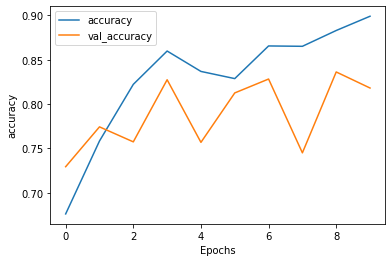

In [13]:
# plot_graphs(history, 'accuracy')

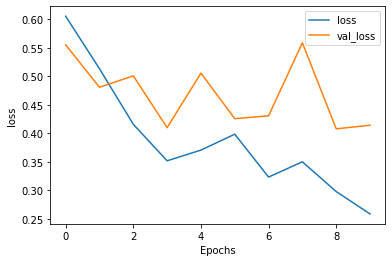

In [15]:
# plot_graphs(history, 'loss')

In [39]:
model.evaluate(test_dataset)

391/391 [==============================] - 131s 334ms/step - loss: 0.4141 - accuracy: 0.8181


[0.4141426086425781, 0.8180800080299377]

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100
padding_type = 'post'
truncating_type = 'post'
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')

sentences = ['wow, such a good idea',
            'game of thrones season finale showing this sunday night',
            'that movie was very lame to watch',
            'what a horrible movie']

tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)


print("model pred:")
print(model.predict(padded))

model pred:
[[0.90388864]
 [0.9475473 ]
 [0.30983862]
 [0.6501941 ]]


In [30]:
# model.save('saved_models/lstm')

INFO:tensorflow:Assets written to: saved_models/lstm\assets


INFO:tensorflow:Assets written to: saved_models/lstm\assets
